In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile_data.csv


In [2]:
data = pd.read_csv("/kaggle/input/automobile-dataset/Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [4]:
# We can see that there is no null values in the data from above information.
# But however we can aslo see from head() that there are few values as '?' in normalized-losses which can indicate as NaN.

In [5]:
print('Number of ? in columns are')
for col in data.columns:
    if len(data[data[col]=='?']) > 0:
        print(col, 'has ->', len(data[data[col]=='?']))

Number of ? in columns are
normalized-losses has -> 41
num-of-doors has -> 2
bore has -> 4
stroke has -> 4
horsepower has -> 2
peak-rpm has -> 2
price has -> 4


In [6]:
# We can see that normalized-losses has the highest numbers of '?' of 41, so we can not delete the rows as it could affect the data. So instead we will replace it with mean values. We will replace the remaining columns with mean values and median as required. 
# We can delete rows where price is '?' as it is low in number and price is the target variable.  

In [7]:
# Repalcing '?' with NaN
data['price'] = data['price'].replace('?', np.NaN)
data['normalized-losses'] = data['normalized-losses'].replace('?', np.NaN)
data['num-of-doors'] = data['num-of-doors'].replace('?', np.NaN)
data['stroke'] = data['stroke'].replace('?', np.NaN)
data['horsepower'] = data['horsepower'].replace('?', np.NaN)
data['peak-rpm'] = data['peak-rpm'].replace('?', np.NaN)
data['bore'] = data['bore'].replace('?', np.NaN)
data['num-of-doors'] = data['num-of-doors'].replace('?', np.NaN)

#Removing rows where price are NaN
data = data[data['price'].notna()]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [9]:
# We can see that the data type of some numerical columns are put in as object
# We will convert it to numerical data type

In [10]:
# Check to see the column names and identify the columns that needs to be changed
data.select_dtypes(['object']).columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [11]:
# From above cell we can see that 'normalized-losses','bore', stroke','horsepower','peak-rpm' and 'price' are object type instead of numeric

In [12]:
# converting Object type to float type
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'])
data['bore'] = pd.to_numeric(data['bore'])
data['stroke'] = pd.to_numeric(data['stroke'])
data['horsepower'] = pd.to_numeric(data['horsepower'])
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'])
data['price'] = pd.to_numeric(data['price'])


#### Replacing NaN values 

In [13]:
# Checking Num-of-doors unique values to replace for NaN
data['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [14]:
# Since it has only 2 unique values and 'four' has the most count, we will replace NaN with 'four'

data['num-of-doors'] = data['num-of-doors'].fillna('four')

In [15]:
# We will use mean as the data in these columns are continuous
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

# We will use median since bore, stroke, peak-rpm have few unique values 
data['bore'] = data['bore'].fillna(data['bore'].median())
data['stroke'] = data['stroke'].fillna(data['stroke'].median())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].median())


#### Now there are no null values in our data and our data is ready for EDA

# EDA

## Visualization on Numerical Data

In [16]:
numerical_cols = data.select_dtypes(['int32','int64','float']).columns
numerical_cols

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

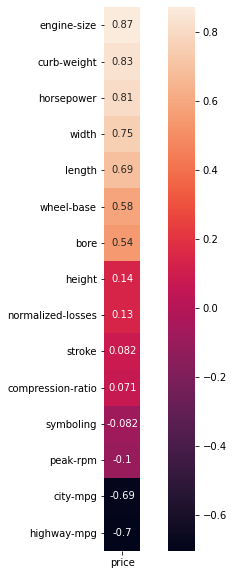

In [17]:
# Checking Correlaion between numerical columns and target variable
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix['price'].sort_values(ascending=False).to_frame()[1:],square=True ,annot=True)
plt.show()

In [18]:
# Engine-size, curb-weight, horsepower are the top 3 highly correlated features to our price. That means these 3 features are very important for our price prediction.
# Whereas symboling, compression_ratio and stroke are least correlated features. We will probably drop these columns later if necessary

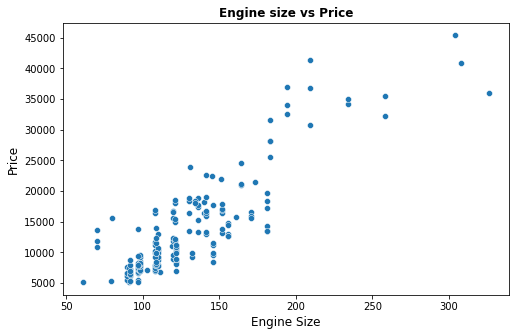

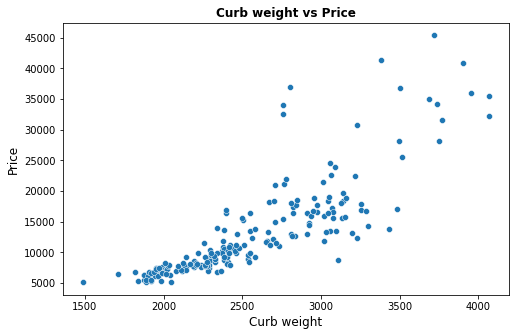

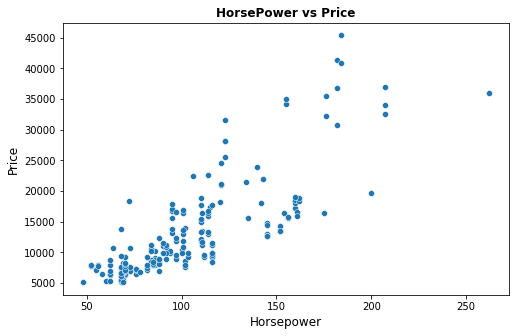

In [19]:
# Plotting our top 3 highly correlated features against target variable
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x=data['engine-size'], y=data['price'])
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Engine size vs Price', weight='bold',fontsize=12)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='curb-weight', y='price')
plt.xlabel('Curb weight', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Curb weight vs Price', weight='bold', fontsize=12)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='horsepower', y='price')
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('HorsePower vs Price', weight='bold', fontsize=12)
plt.show()

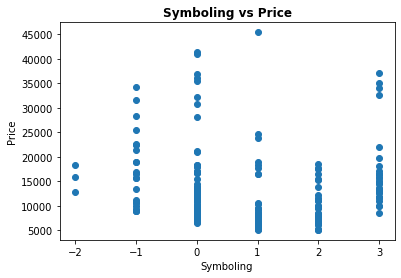

In [20]:
plt.scatter(data['symboling'], data['price'])
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.title('Symboling vs Price',weight='bold', size=12)
plt.show()

In [21]:
# Symboling rating is risk factor therefore it can not be considered as Numerical 
# It is considered as Ordinal Category
# We will create different columns describing each rating further in the analysis

## Visualization of Categorical Data

In [22]:
categorical_cols = data.select_dtypes(['object']).columns
categorical_cols

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [23]:
print(f'Unqiue value counts of fuel-type are: ','\n', data['fuel-type'].value_counts())
print()
print(f'Unqiue value counts of aspiration are', '\n',data['aspiration'].value_counts())
print()
print(f'Unqiue value counts of num-of-doors are', '\n',data['num-of-doors'].value_counts())
print()
print(f'Unqiue value counts of engine-location are', '\n',data['engine-location'].value_counts())

Unqiue value counts of fuel-type are:  
 gas       181
diesel     20
Name: fuel-type, dtype: int64

Unqiue value counts of aspiration are 
 std      165
turbo     36
Name: aspiration, dtype: int64

Unqiue value counts of num-of-doors are 
 four    115
two      86
Name: num-of-doors, dtype: int64

Unqiue value counts of engine-location are 
 front    198
rear       3
Name: engine-location, dtype: int64


In [24]:
# Storing the above columns into separate variables and transforming them into binary values
cols = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']

le = LabelEncoder()

data[cols] = data[cols].apply(le.fit_transform)


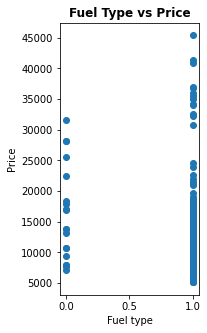

In [25]:
plt.figure(figsize=(2.5,5))
plt.scatter(data['fuel-type'], data['price'])
plt.xlabel('Fuel type', size=10)
plt.ylabel('Price', size=10)
plt.title('Fuel Type vs Price', weight='bold', size=12)
plt.show()

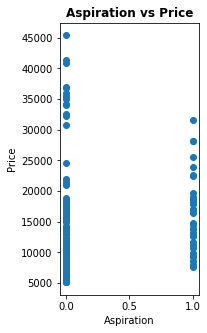

In [26]:
plt.figure(figsize=(2.5,5))
plt.scatter(data['aspiration'], data['price'])
plt.xlabel('Aspiration', size=10)
plt.ylabel('Price', size=10)
plt.title('Aspiration vs Price', weight='bold', size=12)
plt.show()

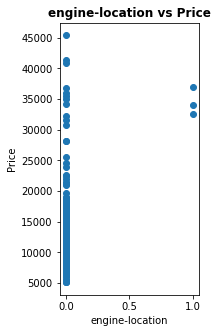

In [27]:
plt.figure(figsize=(2.5,5))
plt.scatter(data['engine-location'], data['price'])
plt.xlabel('engine-location', size=10)
plt.ylabel('Price', size=10)
plt.title('engine-location vs Price', weight='bold', size=12)
plt.show()

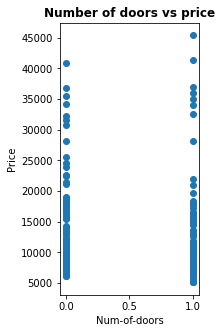

In [28]:
plt.figure(figsize=(2.5,5))
plt.scatter(data['num-of-doors'], data['price'])
plt.xlabel('Num-of-doors', size=10)
plt.ylabel('Price', size=10)
plt.title('Number of doors vs price', weight='bold', size=12)
plt.show()

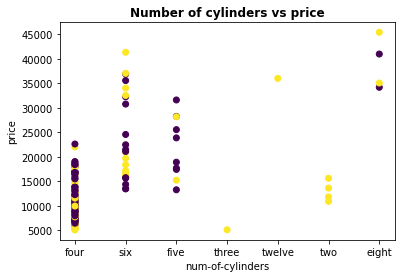

In [29]:
plt.scatter(data=data, x='num-of-cylinders', y='price', c=data['num-of-doors'])
plt.xlabel('num-of-cylinders', size=10)
plt.ylabel('price', size=10)
plt.title('Number of cylinders vs price', weight='bold', size=12)
plt.show()

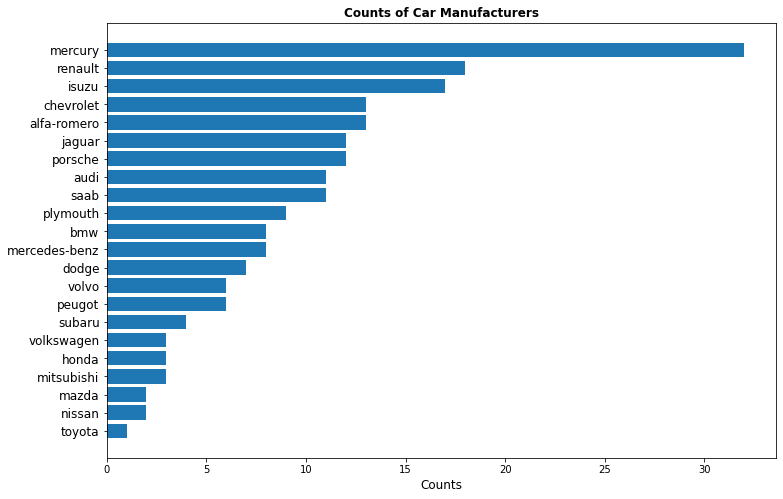

In [30]:
# Plotting bar graph for various categorical features
f, ax = plt.subplots(figsize=(12,8))

ax.barh(data['make'].value_counts().index, data['make'].value_counts().sort_values(ascending=True))
plt.xticks(size=10)
plt.yticks(size=12)
ax.set_xlabel('Counts', fontsize=12)
ax.set_title('Counts of Car Manufacturers', weight='bold', fontsize=12)
plt.show()

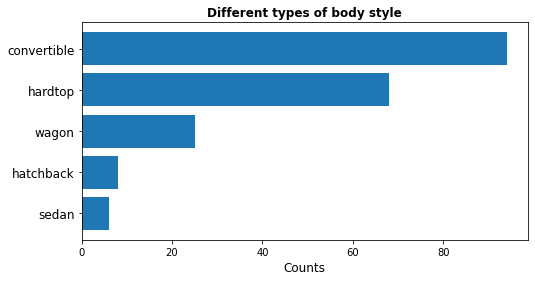

In [31]:
f, ax = plt.subplots(figsize=(8,4))

ax.barh(data['body-style'].value_counts().index, data['body-style'].value_counts().sort_values(ascending=True))
plt.xticks(size=10)
plt.yticks( size=12)
ax.set_xlabel('Counts', fontsize=12)
#ax.set_ylabel('Body Style', fontsize=15)
ax.set_title('Different types of body style', fontsize=12, weight='bold')
plt.show()

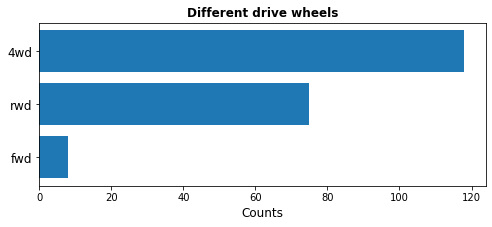

In [32]:
f, ax = plt.subplots(figsize=(8,3))

ax.barh(data['drive-wheels'].value_counts().index, data['drive-wheels'].value_counts().sort_values(ascending=True))
plt.xticks(size=10)
plt.yticks( size=12)
ax.set_xlabel('Counts', fontsize=12)
#ax.set_ylabel('Body Style', fontsize=15)
ax.set_title('Different drive wheels', fontsize=12, weight='bold')
plt.show()

## Checking for Outliers

In [33]:
data.describe()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,0.900498,0.179104,0.427861,0.014925,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330299,3.257562,10.164279,103.396985,5118.407960,25.179104,30.686567,13207.129353
std,1.254802,31.99625,0.300083,0.384397,0.496004,0.121557,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268088,0.316082,4.004965,37.365602,478.183493,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,1.000000,0.000000,0.000000,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,1.000000,0.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,1.000000,0.000000,1.000000,0.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Visualization of Outliers

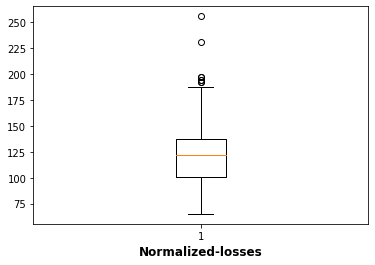

Number of possible outliers in normalized-losses are 2


In [34]:
# normalized-losses has maximum higher than expected from 75 percentile as seen from above description
plt.boxplot(data['normalized-losses'])
plt.xlabel('Normalized-losses', weight='bold', size=12)
plt.show()
print(f'Number of possible outliers in normalized-losses are',len(data[numerical_cols][data['normalized-losses']>200]))

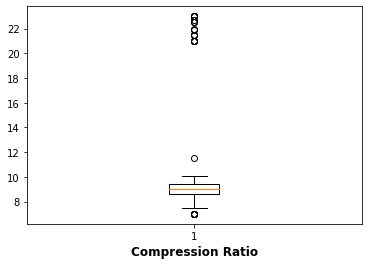

Number of possible outliers in compression ratio are 20


In [35]:
# compression-ratio has maximum higher than expected from 75 percentile as seen from above description
plt.boxplot(data['compression-ratio'])
plt.xlabel('Compression Ratio', weight='bold', size=12)
plt.show()
print(f'Number of possible outliers in compression ratio are',len(data[numerical_cols][data['compression-ratio']>12]))

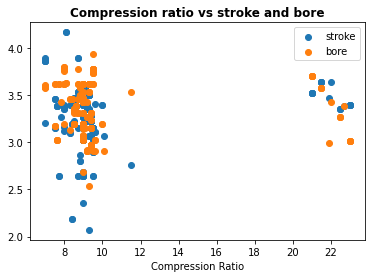

In [36]:
plt.scatter(data=data, x='compression-ratio', y='stroke')
plt.scatter(data=data, x='compression-ratio', y='bore')
plt.xlabel('Compression Ratio', size=10)
plt.title('Compression ratio vs stroke and bore', weight='bold', size=12)
plt.legend(['stroke', 'bore'])
plt.show()

Since the number of compression-ratio points is high and it also fits well with stroke and bore hence it can not be an outlier

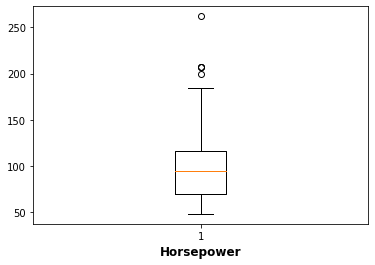

In [37]:
# Horsepower has max higher than expected from the 75 percentile as seen above
plt.boxplot(data['horsepower'])
plt.xlabel('Horsepower', weight='bold', size=12)
plt.show()

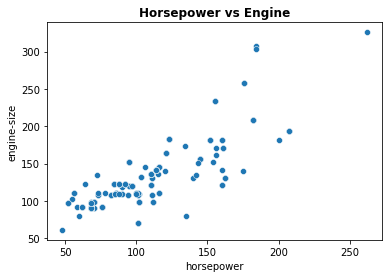

In [38]:
# Checking further with engine size as they both are related
sns.scatterplot(data=data, x='horsepower', y='engine-size')
plt.title('Horsepower vs Engine', weight='bold', size=12)
plt.show()

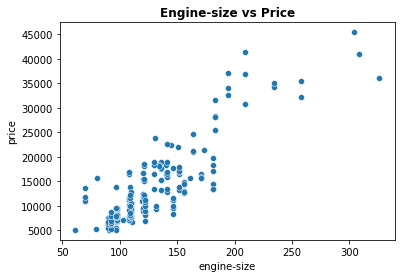

In [39]:
# Plotting Engine-size vs Price for further Analysis
sns.scatterplot(data=data, x='engine-size', y='price')
plt.title('Engine-size vs Price', weight = 'bold', size=12)
plt.show()

Since horsepower and engine are connected and engine size shows no outliers, we can say that there is no outliers in horespower too

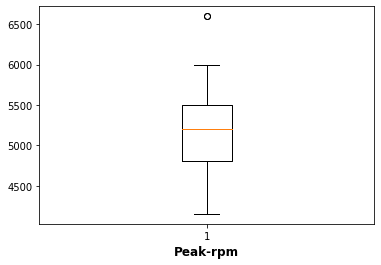

Total number of possible outliers in peak-rpm are: 2


In [40]:
# peak-rpm has max higher than expected from the 75 percentile as seen above
plt.boxplot(data['peak-rpm'])
plt.xlabel('Peak-rpm', weight='bold', size=12)
plt.show()
print(f'Total number of possible outliers in peak-rpm are:',len(data['peak-rpm'][data['peak-rpm']>6000]))

### We can conclude that there are outliers in 2 columns: Normalized-losses and peak-rpm

In [41]:
# Replacing Outliers with 99 percentile

# Finding 99 percentile in normalized losses to replace the outliers
replaced_val = np.percentile(data['normalized-losses'], 99)
print('99th percentile of Normalized-losses is',replaced_val)
data[numerical_cols][data['normalized-losses']>replaced_val]

99th percentile of Normalized-losses is 197.0


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
106,1,231.0,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160.0,5200.0,19,25,18399
190,3,256.0,94.5,165.7,64.0,51.4,2221,109,3.19,3.40,8.5,90.0,5500.0,24,29,9980


In [42]:
# There are 2 values in normalized-losses which can be replaced
data['normalized-losses'] = data['normalized-losses'].replace(231, replaced_val)
data['normalized-losses'] = data['normalized-losses'].replace(256, replaced_val)

In [43]:
# Finding 99 percentile in peak-rpm to replace the outliers
val = np.percentile(data['peak-rpm'], 99)
print('99th percentile of peak-rpm is',val)
data[numerical_cols][data['peak-rpm']>val] 

99th percentile of peak-rpm is 6000.0


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
165,1,168.0,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112.0,6600.0,26,29,9298
166,1,168.0,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112.0,6600.0,26,29,9538


In [44]:
# Both the entries looks repeated so we will drop both rows as both are outliers and number of outliers will remain 1

data.drop(data[data['peak-rpm']==6600].index, axis=0, inplace=True)

# Imputation

In [45]:
categorical_cols = data.select_dtypes(['object']).columns
categorical_cols

Index(['make', 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [46]:
# Creating new feature columns for each categorical data
data = pd.get_dummies(data , columns=['symboling','make', 'body-style', 'drive-wheels', 'num-of-cylinders', 'fuel-system', 'engine-type'], prefix=['symboling','make', 'body-style', 'drive-wheels', 'num-of-cylinders', 'fuel-system', 'engine-type'])
data.columns

Index(['normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'num-of-cylinders_eight',
       'n

# Training our ML model

In [47]:
# We will drop the following columns as it has very low corrrelation to our target variable
data.drop(['compression-ratio', 'stroke'],axis=1, inplace=True)

In [48]:
# Creating Features data and Target data
X = data.drop(['price'], axis=1)
y = data['price']
print(X.shape, y.shape)

(199, 73) (199,)


## Splitting the data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state= 0)
print(f'Training data size is',X_train.shape, y_train.shape)
print(f'Testing data size is',X_test.shape, y_test.shape)

Training data size is (175, 73) (175,)
Testing data size is (24, 73) (24,)


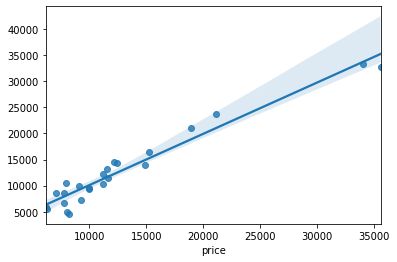

r2 score using Linear Regression model is : 0.9459476450453451


In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

sns.regplot(x = y_test, y=pred)
plt.show()

print('r2 score using Linear Regression model is :',r2_score(y_test, pred))


In [51]:
from sklearn.ensemble import RandomForestRegressor

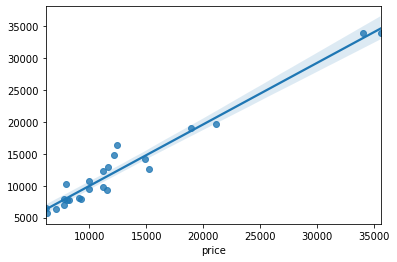

r2 score using RandomForrestRegressor is: 0.9599357659807133


In [52]:
rfg = RandomForestRegressor()

rfg.fit(X_train, y_train)

y_pred = rfg.predict(X_test)

sns.regplot(x=y_test, y=y_pred)
plt.show()

print('r2 score using RandomForrestRegressor is:', r2_score(y_test, y_pred))

# We can Conclude that RandomForrestRegressor gives the best r2 score of 0.95 followed by Linear Regression with r2 score of 0.94